# Student project for Advanced Solid State Physics
Author: Michael Pusterhofer (Technical University of Graz)

## Ferromagnetic magnons in 1D

The dispersion relation for one-dimensional ferromagnetic Magnons is 
$$E = \hbar\omega = 4JS(1-\cos(ka))$$

as found in "Einführung in die Festkörperphysik" from Charles Kittel

With this $k$ can then be expressed by solving the dispersion relation for $k$, which gives two solutions.

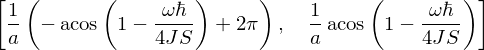

In [1]:
#import symbolic math library
from sympy import *
#initialize pretty printing of formulas
init_printing()
#define symbolic variables
hbar = symbols("hbar")
w,j,s,k,a = var("\omega J S k a")
#solve dispersion relation for k
e1 = 4*j*s*(1-cos(k*a))-w*hbar
e2 = solve(e1,k)
e2

When plotting the two solutions we see that solution two is valid from 0 to $\pi$ and solution one is valid from $\pi$ to $2*\pi$.

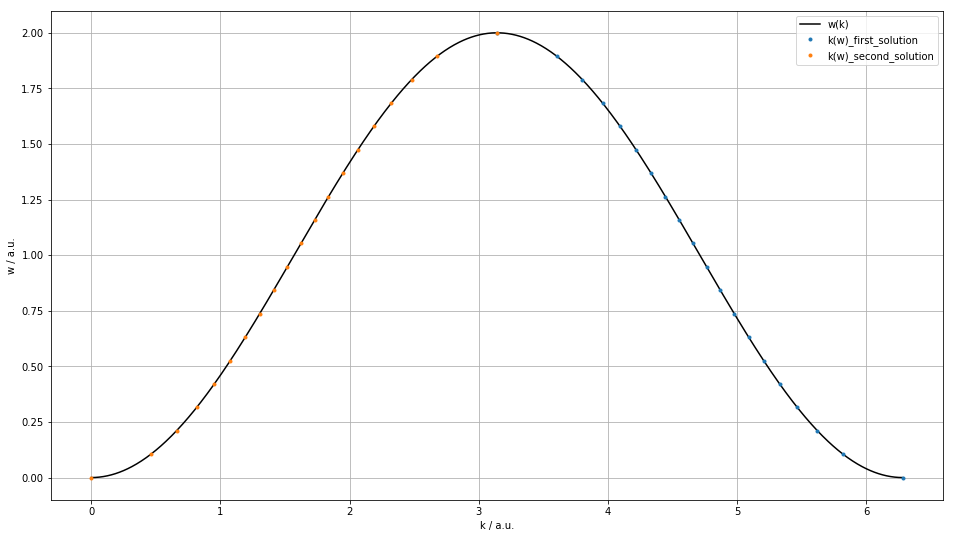

In [2]:
%matplotlib inline
#import plotting library
import matplotlib.pylab as pl
#import numeric library
import numpy as np
#define x and y samples
x=np.linspace(0,2*np.pi,1000)
y=np.linspace(0,2,20)
#plot E(w)
pl.figure(figsize=(16,9))
pl.plot(x,1-np.cos(x),label="w(k)",color="black")
#plot first solution of k(w)
pl.plot(-np.arccos(1-y)+2*np.pi,y,".",label="k(w)_first_solution")
#plot second solution of k(w) 
pl.plot(np.arccos(1-y),y,".",label="k(w)_second_solution")
#legend and labels
pl.xlabel("k / a.u.")
pl.ylabel("w / a.u.")
pl.grid()
pl.legend();

To calculate the density of states in $\omega$ we can use the following expression:
$$D(\omega) = D(k)\frac{dk}{d\omega}$$

$D(k)$ can be calculated similar to the case of Phonons.
For one-dimension and one state per $k$ we get:
$$D(k)= \frac{1}{\pi}$$

The only thing that is missing is the factor $\frac{dk}{dw}$. It can be calculated using the second solution.

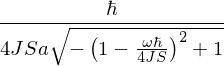

In [3]:
dkdw = diff(e2[1],w)
dkdw

To obtain a function for $\frac{dk}{dw}$ we define a function which substitutes J S, $\hbar$ and a and return a function only dependent on $\omega$.

In [4]:
#import constants
import scipy.constants as const
# return a function of dwdk in omega
def get_function_dkdw_ferromagnetic(value_j, value_s, value_a):
    # symbolic determination of the needed expression
    hbar = symbols("hbar")
    w,j,s,k,a = var("\omega J S k a")
    e1 = 4*j*s*(1-cos(k*a))-w*hbar
    e2 = solve(e1,k)
    dkdw = diff(e2[1],w)
    #substituting the needed values
    sdkdw = dkdw.subs(j,value_j)
    sdkdw = sdkdw.subs(s,value_s)
    sdkdw = sdkdw.subs(a,value_a)
    sdkdw = sdkdw.subs(hbar,const.hbar)
    # simplifying the expression for faster calculation
    sdkdw = simplify(sdkdw)
    #return new expression as function in omega
    return lambdify(w,sdkdw,'numpy')

The highest value for $\omega$ can be determined by solving the dispersion relation for $k = \frac{\pi}{a}$, which can be used to determine the plot limits.

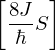

In [5]:
solve(e2[1]-pi/a,w)

When putting it all together the density of states can be plotted. For this the following function is defined.

/opt/miniconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """


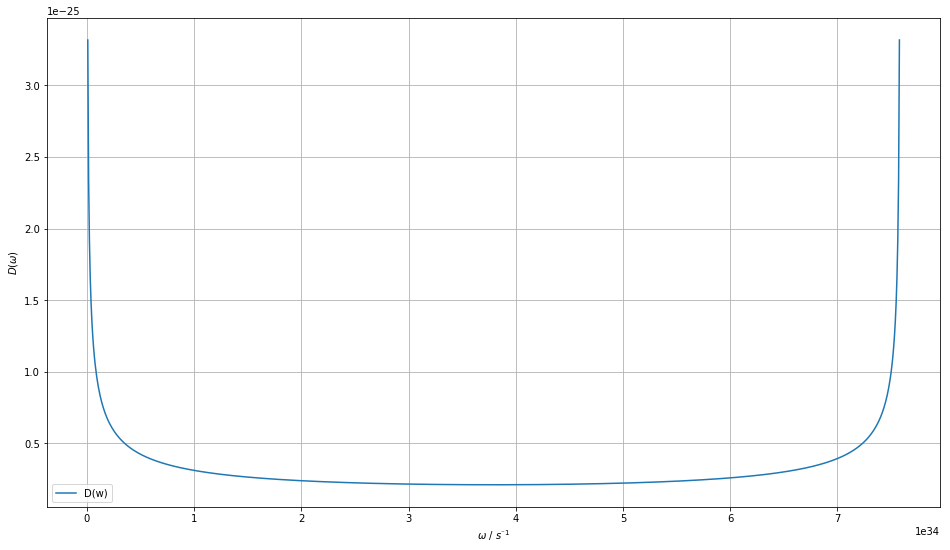

In [6]:
def plot_Dw_ferromagnetic(j,s,a):
    #create 1000 omega sample points
    aw = np.linspace(0,8/const.hbar*j*s,1000)
    #define D(k)
    density_k = 1/(np.pi) 
    #get the function dkdw 
    f_dkdw = get_function_dkdw_ferromagnetic(j,s,a)
    #calculate D(w)
    density_w = density_k*f_dkdw(aw)
    #plot D(w)
    pl.figure(figsize=(16,9))
    pl.plot(aw,density_w,label="D(w)")
    pl.xlabel("$\omega$ / $s^{⁻1}$")
    pl.ylabel("$D(\omega)$")
    pl.grid()
    pl.legend();
plot_Dw_ferromagnetic(2,1/2,4*const.angstrom)    

## Antiferromagnetic magnons in 1D

For antiferromagnetic Magnons a similar approach can be taken. In this case the dispersion relation is given by :

$$E = \hbar\omega = 2JS(\sin(ka))$$

Calculating $k$ also gives two solutions:

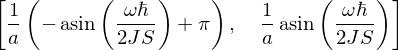

In [7]:
#define symbolic variables
hbar = symbols("hbar")
w,j,s,k,a = var("\omega J S k a")
#solve dispersion relation for k
e1 = 2*j*s*(sin(k*a))-w*hbar
e2 = solve(e1,k)
e2

By plotting the two solutions, we see that the second solution describes the dispersion relation between 0 and $\pi/2$

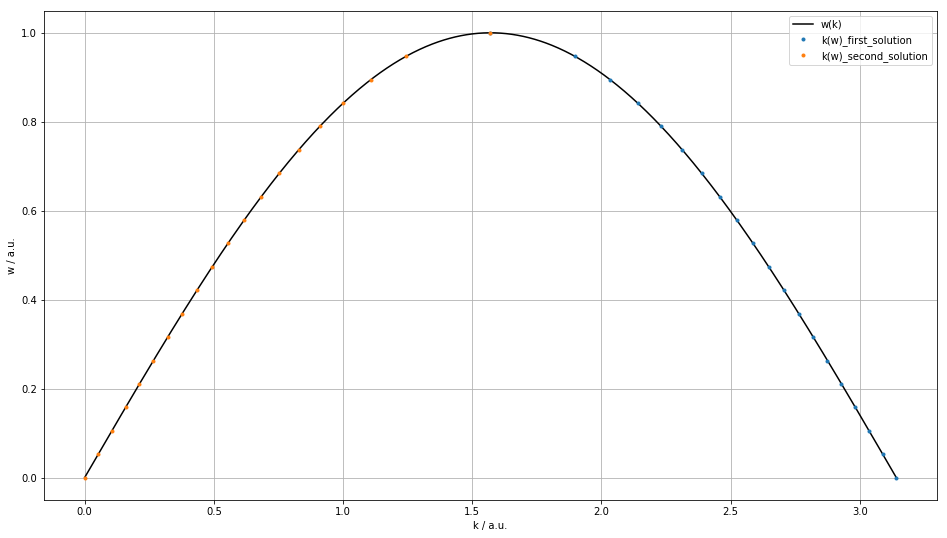

In [8]:
#define x and y samples
x=np.linspace(0,np.pi,1000)
y=np.linspace(0,1,20)
#plot E(w)
pl.figure(figsize=(16,9))
pl.plot(x,np.sin(x),label="w(k)",color="black")
#plot first solution of k(w)
pl.plot(-np.arcsin(y)+np.pi,y,".",label="k(w)_first_solution")
#plot second solution of k(w) 
pl.plot(np.arcsin(y),y,".",label="k(w)_second_solution")
#legend and labels
pl.xlabel("k / a.u.")
pl.ylabel("w / a.u.")
pl.grid()
pl.legend();

To get $D(\omega)$, $\frac{dk}{dw}$ is calculated, which results in

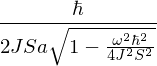

In [9]:
dkdw = diff(e2[1],w)
dkdw

By substituting J, S, a and $\hbar$ a function in $\omega$ is obtained.

In [10]:
def get_function_dkdw_antiferromagnetic(value_j, value_s, value_a):
    # symbolic determination of the needed expression
    hbar = symbols("hbar")
    w,j,s,k,a = var("\omega J S k a")
    e1 = 2*j*s*(sin(k*a))-w*hbar
    e2 = solve(e1,k)
    dkdw = diff(e2[1],w)
    #substituting the needed values
    sdkdw = dkdw.subs(j,value_j)
    sdkdw = sdkdw.subs(s,value_s)
    sdkdw = sdkdw.subs(a,value_a)
    sdkdw = sdkdw.subs(hbar,const.hbar)
    # simplifying the expression for faster calculation
    sdkdw = simplify(sdkdw)
    #return new expression as function in omega
    return lambdify(w,sdkdw,'numpy')

The highest $\omega$ can be determined by solving for $k = \frac{\pi}{2a}$

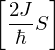

In [11]:
solve(e2[1]-pi/(2*a),w)

/opt/miniconda3/lib/python3.6/site-packages/numpy/__init__.py:1: RuntimeWarning: invalid value encountered in sqrt
  """


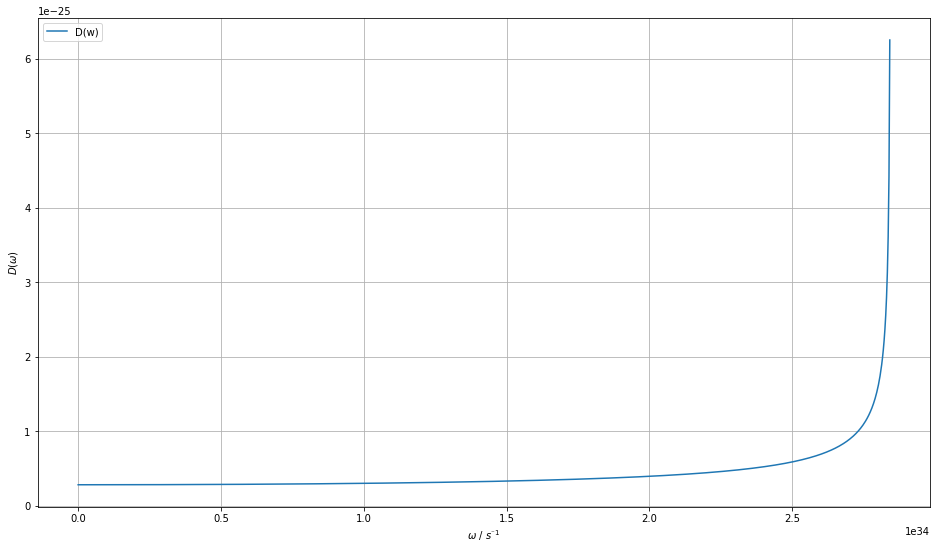

In [12]:
def plot_Dw_antiferromagnetic(j,s,a):
    #create 1000 omega sample points
    aw = np.linspace(0,2/const.hbar*j*s,1000)
    #define D(k)
    density_k = 1/(np.pi) 
    #get the function dkdw 
    f_dkdw = get_function_dkdw_antiferromagnetic(j,s,a)
    #calculate D(w)
    density_w = density_k*f_dkdw(aw)
    #plot D(w)
    pl.figure(figsize=(16,9))
    pl.plot(aw,density_w,label="D(w)")
    pl.xlabel("$\omega$ / $s^{⁻1}$")
    pl.ylabel("$D(\omega)$")
    pl.grid()
    pl.legend();
plot_Dw_antiferromagnetic(3,1/2,4*const.angstrom)    

## Magnon 3d (Kittel)

In [13]:
def density_w_3d(j,s,a):
    w = np.linspace(0,1000)
    return 1/(4*pi**2)*(const.hbar/(2*j*s*a**2))**(3/2)*np.sqrt(w)

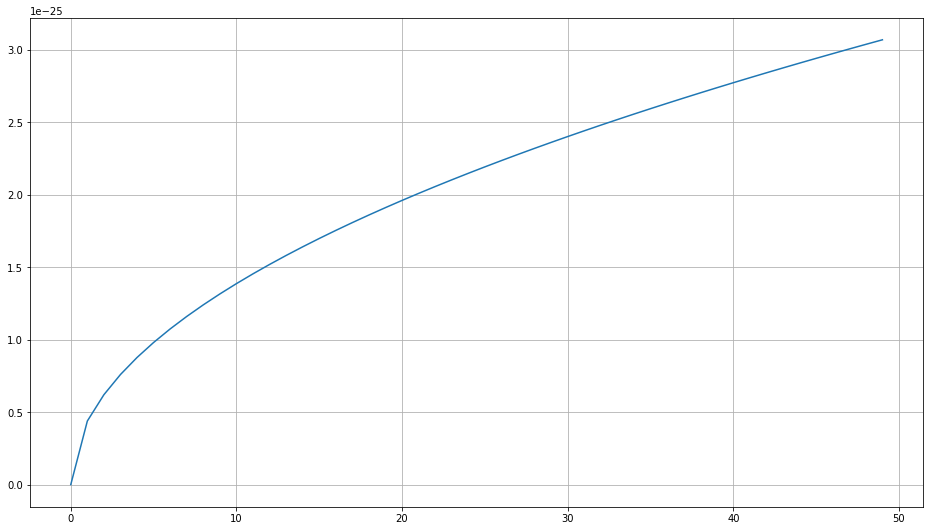

In [14]:
pl.figure(figsize=(16,9))
pl.plot(density_w_3d(1,1,10e-10))
pl.grid()